#### Classification with Neural Network
*Clasification is the task of categorizing the known classes based on their features. In most classification problems, machine learning algorithms can do their job easily, but while classifying a large image dataset, we need to use a neural network. In this tutorial, we will learn defining a neural network and use it to classify images.*

#### Let's Start
*Here, we will use the famous *****MNIST Fashion Dataset*****, which contains 70000 clothing fshion images. our task is to train an image classification model build with Neural Network.*

##### Import Libraries and Load Data
*Let's start the task by importing the necessary libraries and loading the dataset...*

In [1]:
# Import Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Import the Dataset
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

##### Check the data
*Before moving forward, let's have a look at one of the samples of the images from the dataset...*

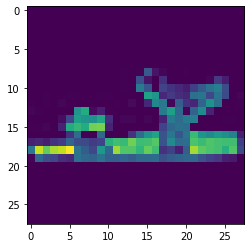

In [2]:
image = xtrain[59999]
#image = xtest[9]
plt.imshow(image)

*Let's have a look the shape of the dataset...*

In [3]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


##### Building a Neural Network
*Now let'sbuild a neural network architecture with three hidden layers. You can add as much hidden layers as you wish. But we need to determine which architecture gives us best result.*

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
#print(model.summery())

*Before training the model, we will split the training data into training and validation sets...*

In [7]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

##### Train the Model
*Now let's train the model we created...*

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7541 - accuracy: 0.7508 - val_loss: 0.4957 - val_accuracy: 0.8324: 2s - loss: 0.8745 - accuracy: 0.71 - ETA - ETA: 1s - loss: 0.8 - ETA: 0s -
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4870 - accuracy: 0.8291 - val_loss: 0.4444 - val_accuracy: 0.8428
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4364 - accuracy: 0.8461 - val_loss: 0.4056 - val_accuracy: 0.8622
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4053 - accuracy: 0.8565 - val_loss: 0.4009 - val_accuracy: 0.8574
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3837 - accuracy: 0.8629 - val_loss: 0.3708 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3657 - accuracy: 0.8696 - val_loss: 0.3690 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 7s 4

*Let's have a look at the prediction...*

In [9]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.98846966 0.         0.         0.         0.         0.
  0.01153039 0.         0.         0.        ]]


*Look at the predicted classes...*

In [10]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 0]
